Exercise 5-1: Import the module scipy.stats that contain probability distributions and statistical functions

In [1]:
 import scipy.stats


In [2]:
scipy.stats.norm.cdf


<bound method rv_continuous.cdf of <scipy.stats._continuous_distns.norm_gen object at 0x00000177DA555A48>>

In [6]:
mu=178
sigma=7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)

In [9]:
dist.mean(), dist.std(),dist.cdf(mu-sigma)

(178.0, 7.7, 0.1586552539314574)

In [13]:
low = dist.cdf(177.8)    # 177.8cm is equivalen to 5'10"
high = dist.cdf(185.4)   # 185.4cm is equivalent to 6'1"
low, high, high-low

(0.48963902786483265, 0.8317337108107857, 0.3420946829459531)

Therefore 34.2% of men in the uS are between 5'10" and 6'1"

Exercise 5-2:To get a feel for the Pareto distribution, let’s see how different
the world would be if the distribution of human height were Pareto. With the
parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable
minimum, 1 m, and median, 1.5 m.

Pareto CDF looks like with alpha = 1.7

In [14]:
scipy.stats.pareto

defining thinkplot

In [16]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import analytic

import thinkstats2
import thinkplot

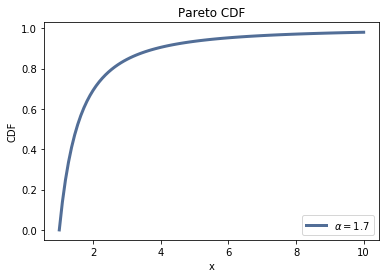

In [21]:
xmin = 1

thinkplot.PrePlot()
for alpha in [1.7]:
 
    thinkplot.Plot(xs, ps, label=r'$\alpha=%g$' % alpha)
    
thinkplot.Config(title='Pareto CDF', xlabel='x',
                 ylabel='CDF', loc='lower right')

Mean height in Pareto world

In [26]:
alpha = 1.7
xmin = 1       # in meters
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.mean()

2.428571428571429

Fraction of people are shorter than the mean

In [27]:
dist.cdf(dist.mean())

0.778739697565288

78% of the population are shorter than 2.4 meters

If there are 7
billion people in Pareto world, how many do we expect to be taller than 1
km? 


In [29]:
dist.cdf

<bound method rv_frozen.cdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000177DDADB488>>

In [32]:
(1 - dist.cdf(1000)) * 7e9

55602.976430479954

How tall do we expect the tallest person to be?

assuming that 1 person out of 7 billion is taller than 6km or 600,000m

In [34]:
dist.sf(600000) * 7e9 

1.0525455861201714

Exercise 6-1:Assumptions about lower and upper bound, that is $5,000 and $250,000 respectively.And how values are distributed in each range: hinc2.py provides InterpolateSample, which shows
one way to model this data. It takes a DataFrame with a column, income,
that contains the upper bound of each range, and freq, which contains the
number of respondents in each frame.
It also takes log_upper, which is an assumed upper bound on the highest
range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is 10^6 or one million dollars.
InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced
on a log10 scale.
Compute the median, mean, skewness and Pearson’s skewness of the resulting
sample. What fraction of households reports a taxable income below the
mean? How do the results depend on the assumed upper bound?

In [233]:

def InterpolateSample(df, log_upper=6.0):   # Makes a sample of log10 household income (Generates a pseudo sample)
    
   
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():

        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        vals = np.linspace(row.log_lower, row.log_upper, int(row.freq))
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    
    return log_sample



In [236]:
import hinc
income_df = hinc.ReadData()

In [237]:

log_sample = InterpolateSample(income_df, log_upper=6.0)


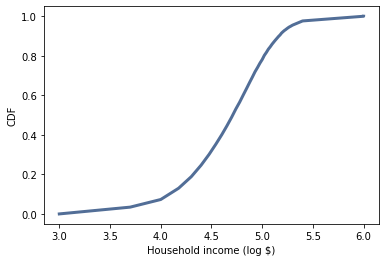

In [238]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [239]:
sample = np.power(10, log_sample)

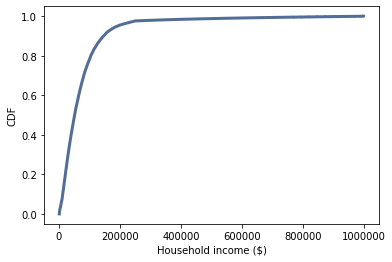

In [240]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

In [241]:
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)

In [242]:
def Mean(xs):
    return RawMoment(xs, 1)

Mean(sample)

74278.70753118733

In [243]:
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)

In [222]:
Mean(sample), Median(sample)

(74278.70753118733, 51226.45447894046)

In [244]:
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [245]:
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)

In [246]:
def Var(xs):
    return CentralMoment(xs, 2)

Var(sample)

8826025649.562702

In [226]:
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

In [247]:
def Skewness(xs):
    return StandardizedMoment(xs, 3)

Skewness(sample)

4.949920244429583

measurement of  how strong that skew is.

In [248]:
Skewness(sample), PearsonMedianSkewness(sample)

(4.949920244429583, 0.7361258019141782)

In [249]:
cdf.Prob(Mean(sample))

0.660005879566872

About 66% of the population earn less than the mean

This analysis is based on the underlying assumption that the highest income is one million dollars, but that's certainly not correct because there could be outliers or items out of the range.For example if the upper bound is $10 million
I believe that if the upper bound is increased to 10 million, it will increase the mean significantly and push the tail further to the right, the skwewness will increase to the right